In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from datetime import datetime
from scipy.stats import skew 

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


File descriptions
    train.csv - the training set
    test.csv - the test set
    data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
    sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

notemos que hay varias columnas que no tienen muchos registros, por ejemplo, alley, PoolQC y Fence

In [5]:
#df_train.drop(columns=['Id'], inplace =True)
#df_test.drop(['Id'],axis=1, inplace =True)

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

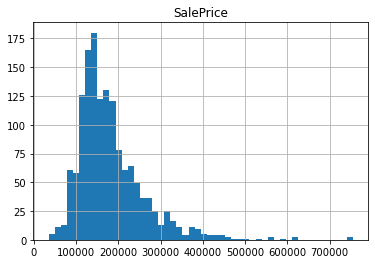

In [6]:
df_train.hist(['SalePrice'], bins=50)

parece que los valores de venta no siguen una distribución normal, por lo que habría que reescalarlos y luego normalizar para aplicar los modelos

In [7]:
df_train=df_train[df_train.GrLivArea <4500]
df_train.reset_index(drop=True,inplace=True)
df_train["SalePrice"]=np.log1p(df_train["SalePrice"])
y=df_train['SalePrice'].reset_index(drop=True)

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

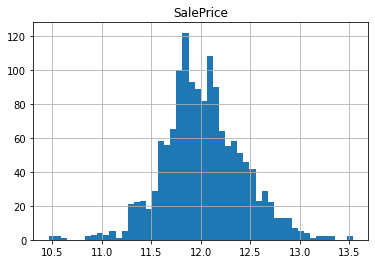

In [8]:
df_train.hist(['SalePrice'],bins=50)

In [9]:
train_features = df_train.drop(['SalePrice'], axis=1)
test_features = df_test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [10]:
#df_train.drop(['Id'], axis=1, inplace=True)
#df_test.drop(['Id'], axis=1, inplace=True)

In [11]:
features.shape

(2917, 79)

In [12]:
d1=[]

[ d1.append(col) for col in list(features.columns) if features[col].isnull().sum().any()>0 and features[col].dtypes=='object' ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [13]:
d1

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

def preprocesado(df)
    cat_col=['MSSubClass','YrSold','MoSold']
    [df[col].apply(str) for col in cat_col]
    df['MasVnrType']=df['MasVnrType'].fillna('None')
    df['MasVnrArea']=df['MasVnrArea'].fillna(0)
    #para el basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    #Para el único valor faltante de Electrical    
    df['Electrical']=df['Electrical'].fillna(method='bfill')
    df['FireplaceQu']=df['FireplaceQu'].fillna(value='None')
    
    #Ahora para el Garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')
    df["PoolQC"] = df["PoolQC"].fillna("None")
    
    objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))
print(objects)


['Alley',
 'Utilities',
 'Exterior1st',----------
 'Exterior2nd',----------
 'MasVnrType',-----------
 'BsmtQual',-------------
 'BsmtCond',-------------
 'BsmtExposure',---------
 'BsmtFinType1',---------
 'BsmtFinType2',---------
 'Electrical',-----------
 'KitchenQual',----------
 'Functional',-----------
 'FireplaceQu',----------
 'GarageType',-----------
 'GarageFinish',---------
 'GarageQual',-----------
 'GarageCond',-----------
 'PoolQC',---------------
 'Fence',
 'MiscFeature',
 'SaleType']-------------

In [14]:
features['Alley'].isnull().sum()

2719

In [15]:
features['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

# Me falta investigar el por que hay valores faltantes en MSZoning

ahora si podemos empezar con la limpieza de datos y con el feature engineering primero vamos a ver lo de los missing values

MSSubClass----- int64   primero notemos que MSSubClass es una variable categorica, pero de tipo entero, entonces deberiamos pasarla a tipo String, pq sino el modelo hará una suma
YrSold ------ int64 igual deberia ser categorica, pero está en int
 MoSold------int64 lo mismo, debería ser categorica, y lo cambiamos a str, para que el modelo no asuma que es una variable numerica

In [16]:
cat_col=['MSSubClass','YrSold','MoSold']
[df_train[col].apply(str) for col in cat_col]

[0       60
 1       20
 2       60
 3       70
 4       60
         ..
 1453    60
 1454    20
 1455    70
 1456    20
 1457    20
 Name: MSSubClass, Length: 1458, dtype: object,
 0       2008
 1       2007
 2       2008
 3       2006
 4       2008
         ... 
 1453    2007
 1454    2010
 1455    2010
 1456    2010
 1457    2008
 Name: YrSold, Length: 1458, dtype: object,
 0        2
 1        5
 2        9
 3        2
 4       12
         ..
 1453     8
 1454     2
 1455     5
 1456     4
 1457     6
 Name: MoSold, Length: 1458, dtype: object]

In [17]:
features['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [18]:
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [19]:
#X = features.copy()
#y = X.pop('MSZoning')

## Label encoding for categoricals
#for colname in X.select_dtypes("object"):
#    X[colname], _ = X[colname].factorize()
#
## All discrete features should now have integer dtypes (double-check this before using MI!)
#discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

## MasVnrType MasVnrArea

In [20]:
features.MasVnrType.unique()  #podemos cambiar el nan por None

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [21]:
features['MasVnrType']=features['MasVnrType'].fillna('None')

In [22]:
features.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [23]:
features['MasVnrArea'].isnull().sum() #son pocos los valores, así que podriamos sustituirlos por la media o revisar si
#los valores faltantes es debido a que MasVnrtype== None

23

In [24]:
fal_MasVnrArea=np.where(features['MasVnrArea'].isnull())[0]
fal_MasVnrArea

array([ 234,  528,  649,  935,  972,  976, 1242, 1277, 1689, 1704, 1880,
       1990, 2002, 2039, 2309, 2323, 2338, 2347, 2366, 2590, 2655, 2684,
       2860], dtype=int64)

In [25]:
[features['MasVnrType'][i] for i in fal_MasVnrArea ] #vemos que todos los valores faltantes en MasVnrArea son debido a que MasVnrType son None
#por lo que podemos cambiarlos a 0 de manera segura

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None']

In [26]:
features['MasVnrArea']=features['MasVnrArea'].fillna(0)

## BSMT

In [27]:
features['BsmtQual'].unique() # Height of the basement por lo que podemos decir que esos nan son debido a que no hay basement

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [28]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

## Electrical, Kitchen y Functional

In [29]:
features.Electrical.isnull().sum()

1

In [30]:
#como solo es un valor el que hace falta, podemos sustituirlo por alguno como el más repetido

In [31]:
features['Electrical']=features['Electrical'].fillna(method='bfill')

In [32]:
features['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', nan], dtype=object)

In [33]:
features['KitchenQual'].fillna("TA") 

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
2912    TA
2913    TA
2914    TA
2915    TA
2916    TA
Name: KitchenQual, Length: 2917, dtype: object

In [34]:
features['Functional'] = features['Functional'].fillna('Typ') 

## FireplaceQu

In [35]:
features['FireplaceQu'].isnull().sum()

1420

In [36]:
#mask1=df_train.MasVnrArea.isnull()
#val_fal=pd.Series(df_train.MasVnrArea.iloc[mask1.values]) #notemos que el resultado son los NaN y por eso no puedo
##operar con val_fal, pues solo almacena los NaN
#val_fal

In [37]:
fal_firequ=np.where(features['FireplaceQu'].isnull())[0]
fal_firequ

array([   0,    5,   10, ..., 2912, 2913, 2915], dtype=int64)

In [38]:
arreglo_fire=features[['Fireplaces','FireplaceQu']].iloc[fal_firequ]

In [39]:
#Al pareces los datos faltantes en FireplaceQu son debido a que en efecto no tiene fireplace la casa, pero será cierto?
arreglo_fire['Fireplaces'].unique()

array([0], dtype=int64)

In [40]:
arreglo_fire['Fireplaces'].nunique()

1

In [41]:
#Parece que no, hay por lo menos un valor en el que si hay fireplace, pero no se registró su calidad
arreglo_fire.loc[lambda df: df['Fireplaces'] == 1]

#al perecer sólo existe el valor 0 por lo que de manera segura podemos cambiar los valores nulos de FireplaceQu a 0 b

,Fireplaces,FireplaceQu


In [42]:
features['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [43]:
features['FireplaceQu']=features['FireplaceQu'].fillna(value='None')

In [44]:
features['FireplaceQu'].unique()

array(['None', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [45]:
features['GarageArea'].isnull().sum()

1

In [46]:
features['GarageArea'].fillna('None')

0       548.0
1       460.0
2       608.0
3       642.0
4       836.0
        ...  
2912      0.0
2913    286.0
2914    576.0
2915      0.0
2916    650.0
Name: GarageArea, Length: 2917, dtype: object

In [47]:
features['GarageArea'].isnull().sum()

1

In [48]:
#Sorprendemente parece que no hay valores faltantes en el GarageArea, solo hay que tiene 0 espacio en el garage

In [49]:
#df_train['GarageArea'].loc[lambda df: df['GarageArea'] == 0]

gar_temp=np.where(features['GarageArea']==0)[0]

In [50]:
gar_temp.size

157

In [51]:
gar_col=['GarageArea','GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [52]:
fal_garage=np.where(features[gar_col].isnull())[0]
fal_garage=np.unique(fal_garage)
fal_garage

array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  527,  532,  534,
        561,  581,  612,  613,  619,  634,  635,  637,  648,  704,  709,
        737,  749,  783,  825,  842,  920,  941,  953,  959,  967,  969,
        975, 1008, 1010, 1029, 1037, 1095, 1122, 1130, 1136, 1142, 1172,
       1178, 1217, 1218, 1233, 1256, 1282, 1321, 1323, 1324, 1335, 1347,
       1405, 1447, 1448, 1451, 1511, 1529, 1537, 1550, 1554, 1556, 1558,
       1588, 1591, 1592, 1612, 1613, 1715, 1719, 1785, 1806, 1808, 1809,
       1817, 1820, 1829, 1832, 1834, 1837, 1845, 1891, 2008, 2079, 2088,
       2091, 2094, 2097, 2102, 2124, 2133, 2149, 2151, 2187, 2188, 2189,
       2190, 2191, 2210, 2236, 2244, 2351, 2352, 2396, 2397, 2420, 2424,
       2550, 2551, 2555, 2573, 2574, 2577, 2601, 2607, 2689, 2691, 2706,
       2765, 2769, 2787, 2789, 2797, 2857, 2860, 28

In [53]:
arreglo_fire=features[gar_col].iloc[fal_garage]
arreglo_fire

,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0.0,NaN,NaN,NaN,NaN,NaN
48,0.0,NaN,NaN,NaN,NaN,NaN
78,0.0,NaN,NaN,NaN,NaN,NaN
88,0.0,NaN,NaN,NaN,NaN,NaN
89,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2891,0.0,NaN,NaN,NaN,NaN,NaN
2907,0.0,NaN,NaN,NaN,NaN,NaN
2911,0.0,NaN,NaN,NaN,NaN,NaN
2912,0.0,NaN,NaN,NaN,NaN,NaN


In [54]:
print(np.setdiff1d(gar_temp, fal_garage)) #Por que me sale que no hay diferencia si hasta el nyumero de filas es diferente

[]


In [55]:
  print(np.array_equal(gar_temp, fal_garage))

False


# Tengo que ver por que no son diferentes y el por que no me marca diferencia

In [56]:
# de gar_temp.size y del arreglo anterior podemos comprobar que en efecto, los valores faltantes en el df son debido a que
#la casa no tiene garage y no a que haya una falta de imput, por lo que cambiaremos los NaN a a None

In [57]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')


 'PoolQC',
 'Fence',
 'MiscFeature'

In [58]:
features['PoolQC'].unique()
features['PoolQC'].isnull().sum()

2908

## PoolQC Exterior1st Exterior2nd SaleType

In [59]:
features["PoolQC"] = features["PoolQC"].fillna("None")

In [60]:
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0]) 
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

In [61]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))
print(objects)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [62]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))
numerics[1:10]

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2']

In [63]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [64]:
mis_col=[]
[mis_col.append(col) for col in features.columns if features[col].isnull().any() == True ]

[]

In [65]:
features[mis_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Empty DataFrame

In [88]:
#features['LotFrontage'].isnull().sum()

486

In [89]:
#features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Feature Engineering

## Realizar analisis de features

In [66]:
# Removing features that are not very useful . This can be understood only by doing proper EDA on data

features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)


# Adding new features . Make sure that you understand this. 

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [67]:
## For ex, if PoolArea = 0 , Then HasPool = 0 too

features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [68]:
features.shape

(2917, 86)

## vamos a usar el método get_dummies para las variables

In [69]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2917, 304)

### Ahora volvemos a separar el test y train data

In [70]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1458, 304), (1458,), (1459, 304))

## ahora a remover outliers

## Tengo que investigar el como se encontraron estos outliers

In [71]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_sub = X_sub.drop(overfit, axis=1)
overfit

['KitchenQual_None']

In [72]:
X.shape

(1453, 303)

# Ultimo paso

In [73]:
# defining error functions for handy use. 


kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [74]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [75]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [76]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)  

In [77]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [78]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [79]:
# Using various prediction models that we just created 


score = cv_rmse(ridge , X)
score = cv_rmse(lasso , X)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.1006 (0.0147)
 2023-01-03 09:22:15.199111
elastic net: 0.1003 (0.0145)
 2023-01-03 09:22:41.195395
SVR: 0.1024 (0.0128)
 2023-01-03 09:22:44.319096
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warni

In [82]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [83]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[09:30:53] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[09:30:57] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:00] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:04] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:08] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM]

In [84]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [85]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.05519286321646007
